In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import re
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.neighbors import KNeighborsRegressor


# Generating some example data

In [2]:
players = pd. read_csv('C:\\Users\\SMSM-TECH\\Downloads\\ML_PROJECT\\player_attributes_table.csv')
players

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2/18/2016 0:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,2,218353,505942,11/19/2015 0:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,3,218353,505942,9/21/2015 0:00,62.0,66.0,right,medium,medium,49.0,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,4,218353,505942,3/20/2015 0:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,5,218353,505942,2/22/2007 0:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183973,183974,102359,39902,8/30/2009 0:00,83.0,85.0,right,medium,low,84.0,...,88.0,83.0,22.0,31.0,30.0,9.0,20.0,84.0,20.0,20.0
183974,183975,102359,39902,2/22/2009 0:00,78.0,80.0,right,medium,low,74.0,...,88.0,70.0,32.0,31.0,30.0,9.0,20.0,73.0,20.0,20.0
183975,183976,102359,39902,8/30/2008 0:00,77.0,80.0,right,medium,low,74.0,...,88.0,70.0,32.0,31.0,30.0,9.0,20.0,73.0,20.0,20.0
183976,183977,102359,39902,8/30/2007 0:00,78.0,81.0,right,medium,low,74.0,...,88.0,53.0,28.0,32.0,30.0,9.0,20.0,73.0,20.0,20.0


In [3]:
players.isna().sum()

id                        0
player_fifa_api_id        0
player_api_id             0
date                      0
overall_rating          836
potential               836
preferred_foot          836
attacking_work_rate    6869
defensive_work_rate     836
crossing                836
finishing               836
heading_accuracy        836
short_passing           836
volleys                2713
dribbling               836
curve                  2713
free_kick_accuracy      836
long_passing            836
ball_control            836
acceleration            836
sprint_speed            836
agility                2713
reactions               836
balance                2713
shot_power              836
jumping                2713
stamina                 836
strength                836
long_shots              836
aggression              836
interceptions           836
positioning             836
vision                 2713
penalties               836
marking                 836
standing_tackle     

In [4]:
players = players.dropna()
players.isna().sum()

id                     0
player_fifa_api_id     0
player_api_id          0
date                   0
overall_rating         0
potential              0
preferred_foot         0
attacking_work_rate    0
defensive_work_rate    0
crossing               0
finishing              0
heading_accuracy       0
short_passing          0
volleys                0
dribbling              0
curve                  0
free_kick_accuracy     0
long_passing           0
ball_control           0
acceleration           0
sprint_speed           0
agility                0
reactions              0
balance                0
shot_power             0
jumping                0
stamina                0
strength               0
long_shots             0
aggression             0
interceptions          0
positioning            0
vision                 0
penalties              0
marking                0
standing_tackle        0
sliding_tackle         0
gk_diving              0
gk_handling            0
gk_kicking             0


In [5]:
players = players.drop_duplicates()

In [6]:
players = players.drop(players.iloc[:,:4].columns,axis = 1)
players

,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,finishing,heading_accuracy,short_passing,volleys,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,67.0,71.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,67.0,71.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,62.0,66.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,61.0,65.0,right,medium,medium,48.0,43.0,70.0,60.0,43.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,61.0,65.0,right,medium,medium,48.0,43.0,70.0,60.0,43.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183973,83.0,85.0,right,medium,low,84.0,77.0,59.0,89.0,77.0,...,88.0,83.0,22.0,31.0,30.0,9.0,20.0,84.0,20.0,20.0
183974,78.0,80.0,right,medium,low,74.0,76.0,53.0,84.0,77.0,...,88.0,70.0,32.0,31.0,30.0,9.0,20.0,73.0,20.0,20.0
183975,77.0,80.0,right,medium,low,74.0,71.0,53.0,84.0,77.0,...,88.0,70.0,32.0,31.0,30.0,9.0,20.0,73.0,20.0,20.0
183976,78.0,81.0,right,medium,low,74.0,64.0,57.0,86.0,77.0,...,88.0,53.0,28.0,32.0,30.0,9.0,20.0,73.0,20.0,20.0


In [7]:
players.info()

<class 'pandas.core.frame.DataFrame'>
Index: 177037 entries, 0 to 183977
Data columns (total 38 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   overall_rating       177037 non-null  float64
 1   potential            177037 non-null  float64
 2   preferred_foot       177037 non-null  object 
 3   attacking_work_rate  177037 non-null  object 
 4   defensive_work_rate  177037 non-null  object 
 5   crossing             177037 non-null  float64
 6   finishing            177037 non-null  float64
 7   heading_accuracy     177037 non-null  float64
 8   short_passing        177037 non-null  float64
 9   volleys              177037 non-null  float64
 10  dribbling            177037 non-null  float64
 11  curve                177037 non-null  float64
 12  free_kick_accuracy   177037 non-null  float64
 13  long_passing         177037 non-null  float64
 14  ball_control         177037 non-null  float64
 15  acceleration         1

In [8]:
print('preferred foot counts:\n',players['preferred_foot'].value_counts(),'\n')
print('attacking work rate counts:\n',players['attacking_work_rate'].value_counts())
print('defensive work rate:\n',players['defensive_work_rate'].value_counts())

preferred foot counts:
 preferred_foot
right    133848
left      43189
Name: count, dtype: int64 

attacking work rate counts:
 attacking_work_rate
medium    125070
high       42823
low         8569
norm         317
y             94
stoc          86
le            78
Name: count, dtype: int64
defensive work rate:
 defensive_work_rate
medium    130764
high       26972
low        18425
ormal        317
es            94
2             89
tocky         86
ean           78
1             44
6             34
5             28
4             27
3             23
0             20
9             17
7             14
8              5
Name: count, dtype: int64


In [9]:
# List of values to exclude
exclude_values = ['high', 'medium', 'low']

# Create a condition to filter rows
condition1 = ~players['attacking_work_rate'].isin(exclude_values)

In [10]:
# Apply the condition to get the desired rows
result_attack = players[condition1]
result_attack = result_attack.index
players = players.drop(result_attack)

In [11]:
condition2 = ~players['defensive_work_rate'].isin(exclude_values)

# Apply the condition to get the desired rows
result_defensive = players[condition2]
result_defensive = result_defensive.index

In [12]:
players = players.drop(result_defensive)

players

,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,finishing,heading_accuracy,short_passing,volleys,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,67.0,71.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,67.0,71.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,62.0,66.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,61.0,65.0,right,medium,medium,48.0,43.0,70.0,60.0,43.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,61.0,65.0,right,medium,medium,48.0,43.0,70.0,60.0,43.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183973,83.0,85.0,right,medium,low,84.0,77.0,59.0,89.0,77.0,...,88.0,83.0,22.0,31.0,30.0,9.0,20.0,84.0,20.0,20.0
183974,78.0,80.0,right,medium,low,74.0,76.0,53.0,84.0,77.0,...,88.0,70.0,32.0,31.0,30.0,9.0,20.0,73.0,20.0,20.0
183975,77.0,80.0,right,medium,low,74.0,71.0,53.0,84.0,77.0,...,88.0,70.0,32.0,31.0,30.0,9.0,20.0,73.0,20.0,20.0
183976,78.0,81.0,right,medium,low,74.0,64.0,57.0,86.0,77.0,...,88.0,53.0,28.0,32.0,30.0,9.0,20.0,73.0,20.0,20.0


In [13]:
print('preferred foot counts:\n',players['preferred_foot'].value_counts(),'\n')
print('attacking work rate counts:\n',players['attacking_work_rate'].value_counts())
print('defensive work rate:\n',players['defensive_work_rate'].value_counts())

preferred foot counts:
 preferred_foot
right    133102
left      43059
Name: count, dtype: int64 

attacking work rate counts:
 attacking_work_rate
medium    124871
high       42751
low         8539
Name: count, dtype: int64
defensive work rate:
 defensive_work_rate
medium    130764
high       26972
low        18425
Name: count, dtype: int64


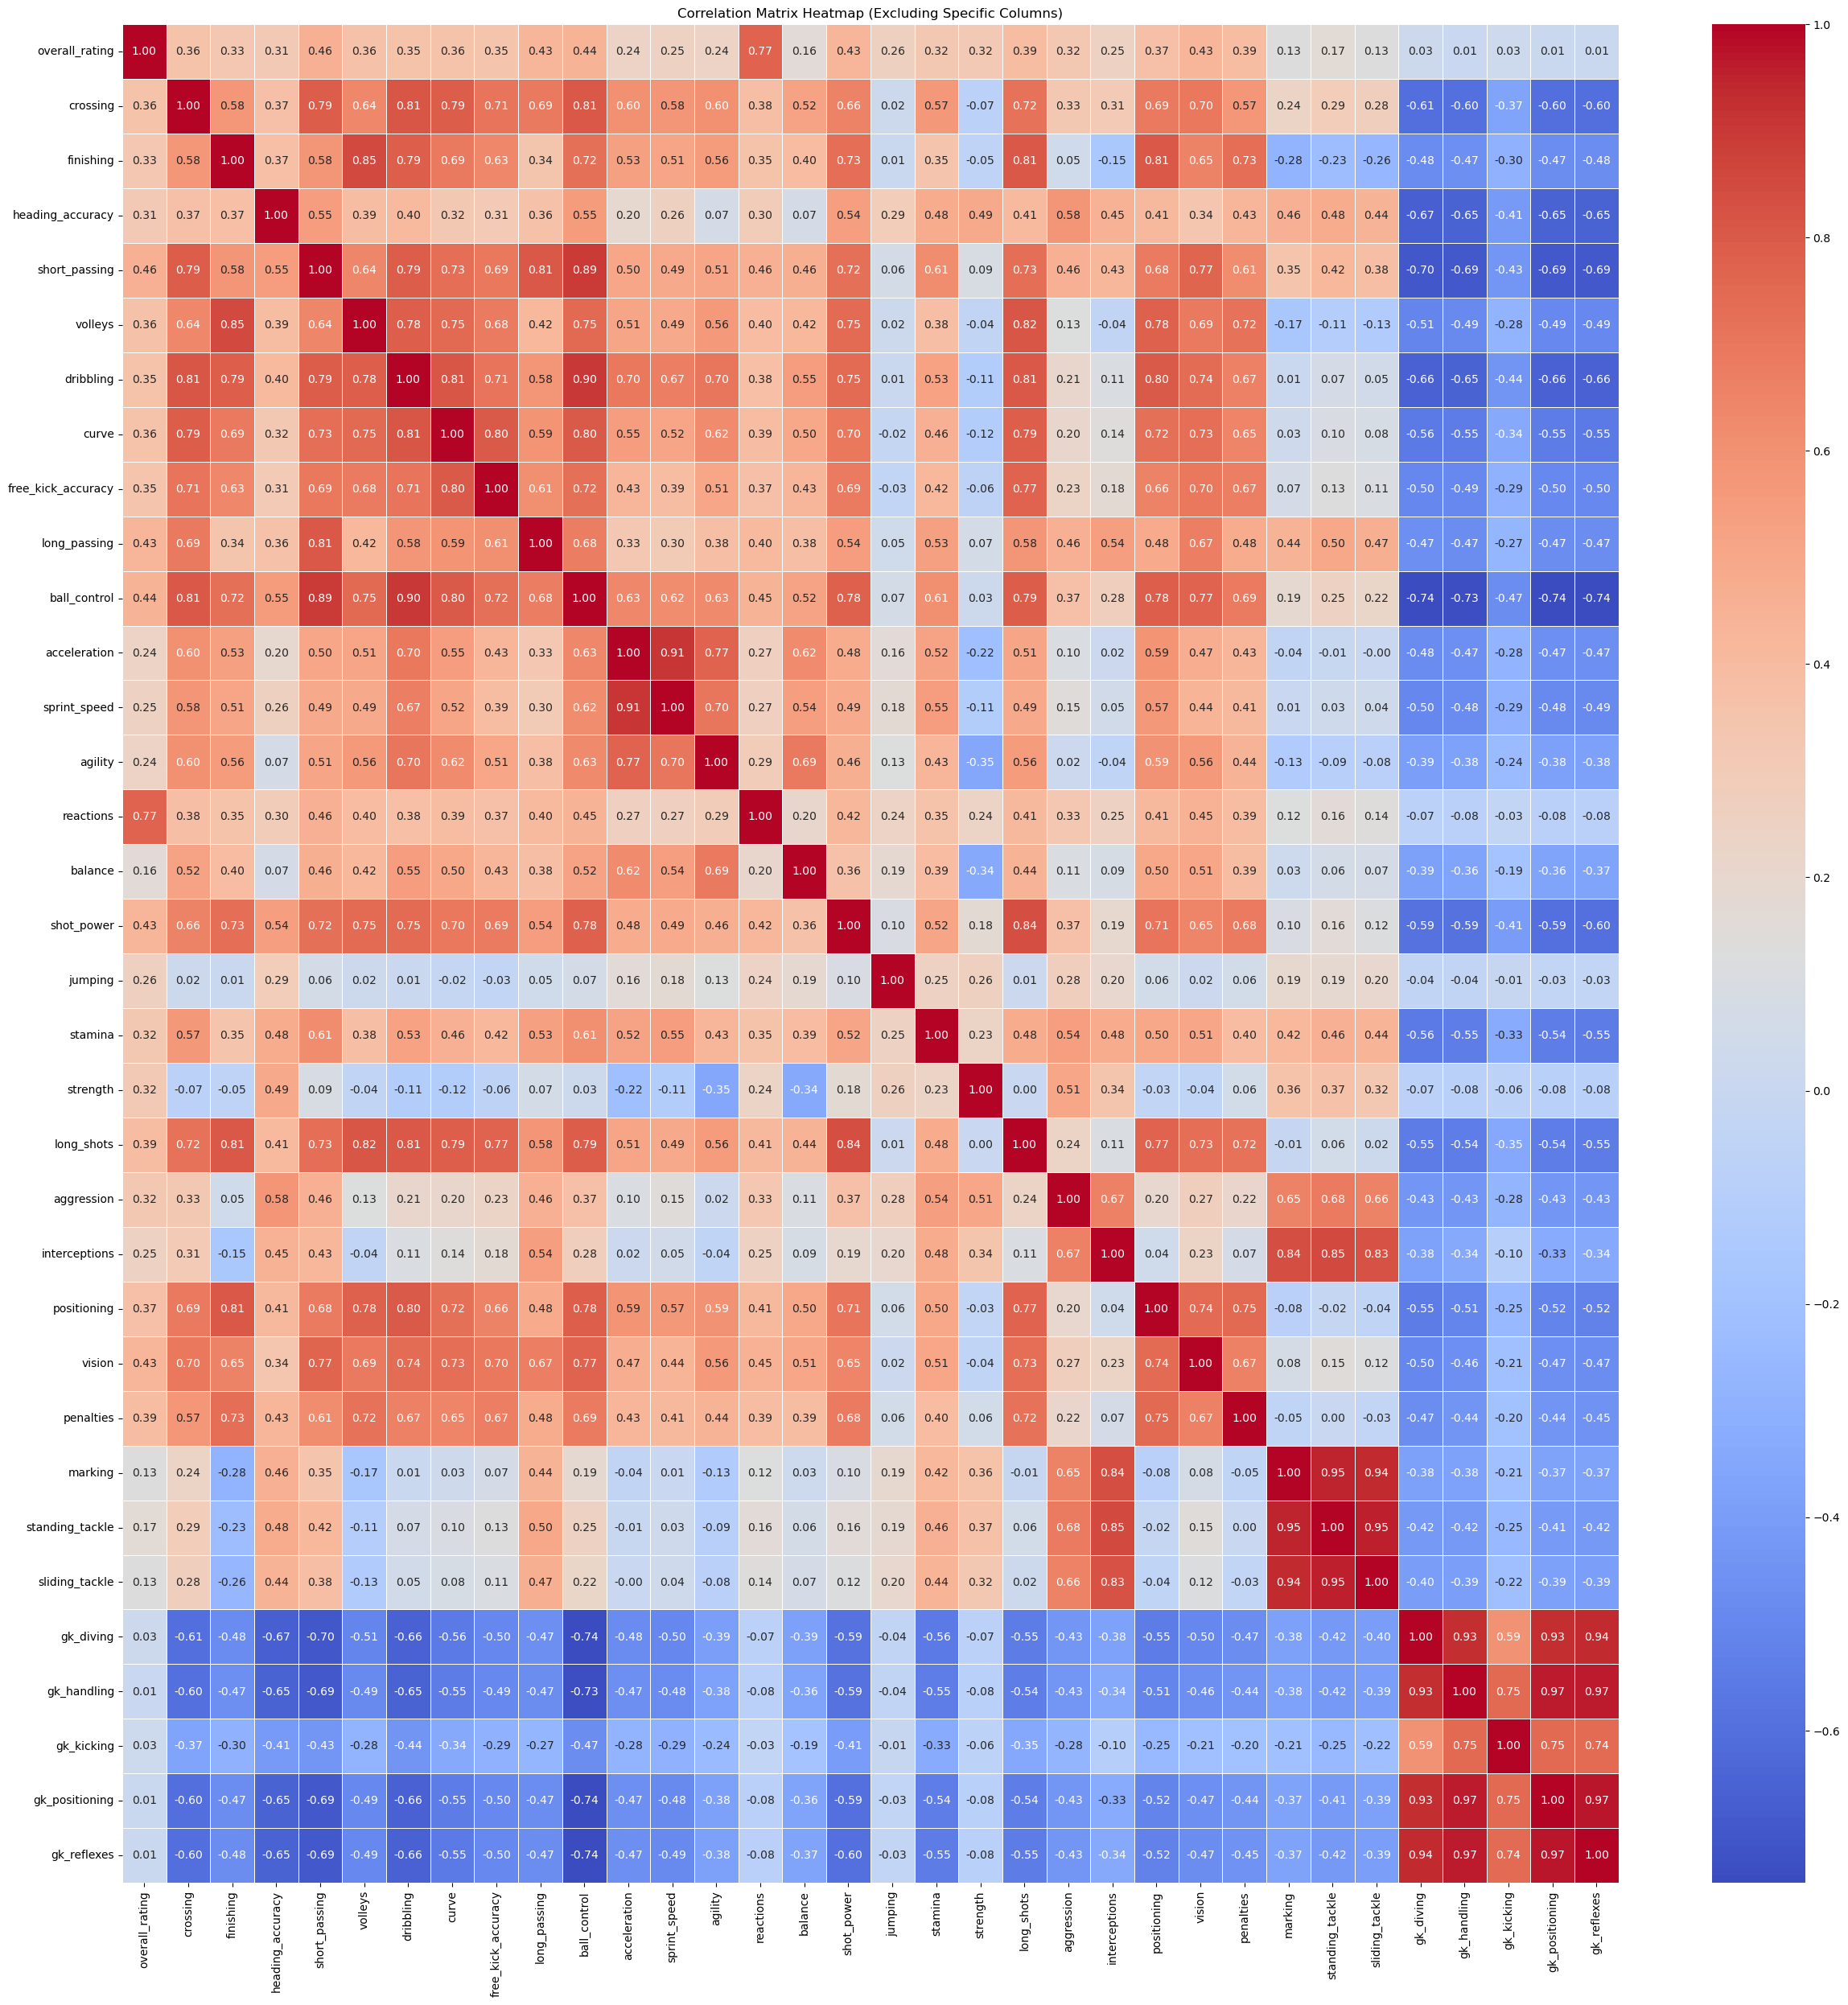

Column pairs with correlation > 0.85:
('finishing', 'volleys')
('short_passing', 'ball_control')
('dribbling', 'ball_control')
('acceleration', 'sprint_speed')
('interceptions', 'standing_tackle')
('marking', 'standing_tackle')
('marking', 'sliding_tackle')
('standing_tackle', 'sliding_tackle')
('gk_diving', 'gk_handling')
('gk_diving', 'gk_positioning')
('gk_diving', 'gk_reflexes')
('gk_handling', 'gk_positioning')
('gk_handling', 'gk_reflexes')
('gk_positioning', 'gk_reflexes')


In [14]:
columns_to_exclude = ['potential', 'preferred_foot', 'attacking_work_rate', 'defensive_work_rate']

# Create a DataFrame without the excluded columns
players_subset = players.drop(columns=columns_to_exclude)

# Calculate the correlation matrix
correlation_matrix = players_subset.corr()

# Create a heatmap
plt.figure(figsize=(30, 30))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix Heatmap (Excluding Specific Columns)')
plt.show()

high_corr_pairs = []

for i in range(len(correlation_matrix.columns)):
    for j in range(i + 1, len(correlation_matrix.columns)):
        if abs(correlation_matrix.iloc[i, j]) > 0.85:
            high_corr_pairs.append((correlation_matrix.columns[i], correlation_matrix.columns[j]))

print("Column pairs with correlation > 0.85:")
for pair in high_corr_pairs:
    print(pair)

In [15]:
columns_to_drop = [pair[0] for pair in high_corr_pairs]

# Drop the columns from the DataFrame
players.drop(columns=columns_to_drop)

# Display the resulting DataFrame


,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,heading_accuracy,volleys,curve,free_kick_accuracy,...,stamina,strength,long_shots,aggression,positioning,vision,penalties,sliding_tackle,gk_kicking,gk_reflexes
0,67.0,71.0,right,medium,medium,49.0,71.0,44.0,45.0,39.0,...,54.0,76.0,35.0,71.0,45.0,54.0,48.0,69.0,10.0,8.0
1,67.0,71.0,right,medium,medium,49.0,71.0,44.0,45.0,39.0,...,54.0,76.0,35.0,71.0,45.0,54.0,48.0,69.0,10.0,8.0
2,62.0,66.0,right,medium,medium,49.0,71.0,44.0,45.0,39.0,...,54.0,76.0,35.0,63.0,45.0,54.0,48.0,69.0,10.0,8.0
3,61.0,65.0,right,medium,medium,48.0,70.0,43.0,44.0,38.0,...,54.0,76.0,34.0,62.0,44.0,53.0,47.0,66.0,9.0,7.0
4,61.0,65.0,right,medium,medium,48.0,70.0,43.0,44.0,38.0,...,54.0,76.0,34.0,62.0,44.0,53.0,47.0,66.0,9.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183973,83.0,85.0,right,medium,low,84.0,59.0,77.0,86.0,78.0,...,72.0,67.0,81.0,56.0,86.0,88.0,83.0,30.0,84.0,20.0
183974,78.0,80.0,right,medium,low,74.0,53.0,77.0,86.0,74.0,...,66.0,65.0,73.0,61.0,72.0,88.0,70.0,30.0,73.0,20.0
183975,77.0,80.0,right,medium,low,74.0,53.0,77.0,86.0,74.0,...,66.0,65.0,73.0,67.0,72.0,88.0,70.0,30.0,73.0,20.0
183976,78.0,81.0,right,medium,low,74.0,57.0,77.0,86.0,73.0,...,67.0,59.0,78.0,63.0,68.0,88.0,53.0,30.0,73.0,20.0


In [16]:
dummy_foot = pd.get_dummies(players['preferred_foot'], prefix='preferred_foot')
dummy_attack = pd.get_dummies(players['attacking_work_rate'], prefix='attacking_work_rate')
dummy_defence = pd.get_dummies(players['defensive_work_rate'], prefix='defensive_work_rate')
players = pd.concat([players, dummy_foot], axis=1)
players = pd.concat([players, dummy_attack], axis=1)
players = pd.concat([players, dummy_defence], axis=1)
players = players.drop(['defensive_work_rate','preferred_foot','attacking_work_rate'],axis = 1)
players

,overall_rating,potential,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,...,gk_positioning,gk_reflexes,preferred_foot_left,preferred_foot_right,attacking_work_rate_high,attacking_work_rate_low,attacking_work_rate_medium,defensive_work_rate_high,defensive_work_rate_low,defensive_work_rate_medium
0,67.0,71.0,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,...,8.0,8.0,False,True,False,False,True,False,False,True
1,67.0,71.0,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,...,8.0,8.0,False,True,False,False,True,False,False,True
2,62.0,66.0,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,...,8.0,8.0,False,True,False,False,True,False,False,True
3,61.0,65.0,48.0,43.0,70.0,60.0,43.0,50.0,44.0,38.0,...,7.0,7.0,False,True,False,False,True,False,False,True
4,61.0,65.0,48.0,43.0,70.0,60.0,43.0,50.0,44.0,38.0,...,7.0,7.0,False,True,False,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183973,83.0,85.0,84.0,77.0,59.0,89.0,77.0,84.0,86.0,78.0,...,20.0,20.0,False,True,False,False,True,False,True,False
183974,78.0,80.0,74.0,76.0,53.0,84.0,77.0,85.0,86.0,74.0,...,20.0,20.0,False,True,False,False,True,False,True,False
183975,77.0,80.0,74.0,71.0,53.0,84.0,77.0,85.0,86.0,74.0,...,20.0,20.0,False,True,False,False,True,False,True,False
183976,78.0,81.0,74.0,64.0,57.0,86.0,77.0,87.0,86.0,73.0,...,20.0,20.0,False,True,False,False,True,False,True,False


In [17]:
X = players.drop(['overall_rating'],axis = 1)
y = players['overall_rating']

In [19]:
y


0         67.0
1         67.0
2         62.0
3         61.0
4         61.0
          ... 
183973    83.0
183974    78.0
183975    77.0
183976    78.0
183977    80.0
Name: overall_rating, Length: 176161, dtype: float64

In [20]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y,train_size=0.6, test_size=0.4, random_state=42)

In [21]:
X_train.describe()

,potential,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,long_passing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
count,105696.000000,105696.000000,105696.000000,105696.000000,105696.000000,105696.000000,105696.000000,105696.000000,105696.000000,105696.000000,...,105696.000000,105696.000000,105696.000000,105696.000000,105696.000000,105696.000000,105696.000000,105696.000000,105696.000000,105696.000000
mean,73.515686,55.185778,50.002536,57.229668,62.526122,49.548753,59.342917,53.046861,49.399552,57.121083,...,57.843003,54.883789,46.697188,50.289434,47.974786,14.763123,15.927462,20.244711,15.989990,16.301203
std,6.573166,17.251270,19.016034,16.516631,14.149654,18.250604,17.727937,18.241655,17.790219,14.392455,...,15.132084,15.546457,21.267325,21.527228,21.616369,16.919290,15.925391,20.964801,16.156232,17.269133
min,39.000000,2.000000,1.000000,2.000000,3.000000,1.000000,1.000000,2.000000,1.000000,4.000000,...,1.000000,2.000000,1.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,69.000000,45.000000,34.000000,49.000000,58.000000,35.000000,52.000000,41.000000,36.000000,49.000000,...,49.000000,45.000000,25.000000,29.000000,25.000000,7.000000,8.000000,8.000000,8.000000,8.000000
50%,74.000000,59.000000,53.000000,60.000000,65.000000,52.000000,64.000000,56.000000,50.000000,60.000000,...,60.000000,57.000000,50.000000,56.000000,53.000000,10.000000,11.000000,11.000000,11.000000,11.000000
75%,78.000000,68.000000,65.000000,68.000000,72.000000,64.000000,72.000000,67.000000,63.000000,67.000000,...,69.000000,66.000000,66.000000,69.000000,67.000000,13.000000,15.000000,15.000000,15.000000,15.000000
max,97.000000,95.000000,97.000000,95.000000,97.000000,93.000000,97.000000,94.000000,97.000000,97.000000,...,97.000000,96.000000,94.000000,95.000000,95.000000,94.000000,93.000000,97.000000,96.000000,96.000000


In [22]:
X_test.describe()

,potential,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,long_passing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
count,70465.000000,70465.000000,70465.000000,70465.000000,70465.000000,70465.000000,70465.000000,70465.000000,70465.000000,70465.000000,...,70465.000000,70465.000000,70465.000000,70465.000000,70465.000000,70465.000000,70465.000000,70465.000000,70465.000000,70465.000000
mean,73.524814,55.252764,50.116739,57.312510,62.566182,49.621088,59.406727,53.171064,49.458497,57.161343,...,57.954644,55.027021,46.773987,50.423799,48.100830,14.658483,15.840460,20.256482,15.920542,16.239892
std,6.587673,17.273511,19.056880,16.469365,14.235405,18.287389,17.775021,18.308238,17.874104,14.467494,...,15.203329,15.569404,21.202308,21.510115,21.629228,16.783763,15.769754,20.940670,15.995393,17.139928
min,42.000000,1.000000,1.000000,1.000000,3.000000,1.000000,1.000000,2.000000,1.000000,3.000000,...,2.000000,3.000000,2.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,69.000000,45.000000,34.000000,50.000000,57.000000,36.000000,52.000000,41.000000,36.000000,49.000000,...,49.000000,45.000000,25.000000,29.000000,25.000000,7.000000,8.000000,8.000000,8.000000,8.000000
50%,74.000000,59.000000,53.000000,60.000000,65.000000,52.000000,64.000000,56.000000,50.000000,59.000000,...,60.000000,57.000000,50.000000,56.000000,53.000000,10.000000,11.000000,12.000000,11.000000,11.000000
75%,78.000000,68.000000,65.000000,68.000000,72.000000,64.000000,72.000000,67.000000,64.000000,67.000000,...,69.000000,67.000000,66.000000,69.000000,67.000000,13.000000,15.000000,15.000000,15.000000,15.000000
max,97.000000,95.000000,97.000000,98.000000,97.000000,93.000000,97.000000,94.000000,96.000000,97.000000,...,97.000000,96.000000,93.000000,95.000000,95.000000,94.000000,92.000000,97.000000,96.000000,96.000000


In [21]:
X.iloc[:,:players.columns.get_loc('gk_reflexes')].columns

Index(['potential', 'crossing', 'finishing', 'heading_accuracy',
       'short_passing', 'volleys', 'dribbling', 'curve', 'free_kick_accuracy',
       'long_passing', 'ball_control', 'acceleration', 'sprint_speed',
       'agility', 'reactions', 'balance', 'shot_power', 'jumping', 'stamina',
       'strength', 'long_shots', 'aggression', 'interceptions', 'positioning',
       'vision', 'penalties', 'marking', 'standing_tackle', 'sliding_tackle',
       'gk_diving', 'gk_handling', 'gk_kicking', 'gk_positioning',
       'gk_reflexes'],
      dtype='object')

In [23]:
# Create a StandardScaler instance
scaler = StandardScaler()
columns_to_standardize = X.iloc[:,:players.columns.get_loc('gk_reflexes')].columns

# Fit the scaler to the selected columns and transform them
scaled_columns_train = scaler.fit_transform(X_train[columns_to_standardize])
scaled_columns_test = scaler.fit_transform(X_test[columns_to_standardize])

# Replace the original columns with the standardized values in the DataFrame
X_train[columns_to_standardize] = scaled_columns_train
X_test[columns_to_standardize] = scaled_columns_test


In [24]:
X_train.describe()

,potential,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,long_passing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
count,1.056960e+05,1.056960e+05,1.056960e+05,1.056960e+05,1.056960e+05,1.056960e+05,1.056960e+05,1.056960e+05,1.056960e+05,1.056960e+05,...,1.056960e+05,1.056960e+05,1.056960e+05,1.056960e+05,1.056960e+05,1.056960e+05,1.056960e+05,1.056960e+05,1.056960e+05,1.056960e+05
mean,5.005583e-16,2.470524e-18,-1.574413e-16,1.787516e-16,-2.269520e-16,1.027200e-16,-1.480970e-16,1.636932e-16,-1.323663e-16,3.630157e-17,...,1.707518e-17,6.557811e-17,4.625089e-17,-4.759539e-17,-5.767916e-17,-1.052073e-17,1.848691e-17,3.495707e-17,-1.680628e-17,-5.162890e-17
std,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,...,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00
min,-5.251024e+00,-3.083021e+00,-2.576918e+00,-3.343898e+00,-4.206916e+00,-2.660130e+00,-3.291031e+00,-2.798381e+00,-2.720584e+00,-3.690915e+00,...,-3.756473e+00,-3.401678e+00,-2.148714e+00,-2.243190e+00,-2.126861e+00,-8.134613e-01,-9.373417e-01,-9.179578e-01,-9.278191e-01,-8.860477e-01
25%,-6.869913e-01,-5.904392e-01,-8.415325e-01,-4.982679e-01,-3.198766e-01,-7.971693e-01,-4.142023e-01,-6.604071e-01,-7.532012e-01,-5.642624e-01,...,-5.843904e-01,-6.357613e-01,-1.020217e+00,-9.889585e-01,-1.062847e+00,-4.588348e-01,-4.977899e-01,-5.840632e-01,-4.945477e-01,-4.806983e-01
50%,7.368075e-02,2.210991e-01,1.576290e-01,1.677306e-01,1.748375e-01,1.343111e-01,2.626986e-01,1.618906e-01,3.375176e-02,2.000305e-01,...,1.425453e-01,1.361224e-01,1.553006e-01,2.652730e-01,2.324737e-01,-2.815216e-01,-3.094106e-01,-4.409656e-01,-3.088600e-01,-3.069771e-01
75%,6.822184e-01,7.428023e-01,7.886784e-01,6.520932e-01,6.695516e-01,7.918267e-01,7.139659e-01,7.649089e-01,7.644938e-01,6.863988e-01,...,7.373109e-01,7.150351e-01,9.076319e-01,8.691623e-01,8.801341e-01,-1.042083e-01,-5.823820e-02,-2.501687e-01,-6.127634e-02,-7.534887e-02
max,3.572772e+00,2.307912e+00,2.471477e+00,2.286817e+00,2.436388e+00,2.380823e+00,2.124176e+00,2.245045e+00,2.675665e+00,2.770834e+00,...,2.587693e+00,2.644744e+00,2.224212e+00,2.076941e+00,2.175455e+00,4.683249e+00,4.839624e+00,3.661168e+00,4.952292e+00,4.615123e+00


In [25]:
X_test.describe()

,potential,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,long_passing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
count,7.046500e+04,7.046500e+04,7.046500e+04,7.046500e+04,7.046500e+04,7.046500e+04,7.046500e+04,7.046500e+04,7.046500e+04,7.046500e+04,...,7.046500e+04,7.046500e+04,7.046500e+04,7.046500e+04,7.046500e+04,7.046500e+04,7.046500e+04,7.046500e+04,7.046500e+04,7.046500e+04
mean,8.187905e-16,-1.173734e-16,-1.152054e-16,-1.483301e-16,-1.316922e-16,-8.389577e-17,2.783081e-17,-1.609851e-16,-1.898243e-16,-1.743963e-16,...,1.192389e-16,-3.614980e-17,7.582887e-17,6.554357e-17,-4.335959e-17,3.398182e-17,2.369652e-18,1.835220e-17,-1.764635e-17,4.532590e-17
std,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,...,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00
min,-4.785459e+00,-3.140829e+00,-2.577394e+00,-3.419252e+00,-4.184398e+00,-2.658741e+00,-3.285911e+00,-2.794995e+00,-2.711120e+00,-3.743684e+00,...,-3.680447e+00,-3.341643e+00,-2.111766e+00,-2.297717e+00,-2.131429e+00,-8.137972e-01,-9.410778e-01,-9.195799e-01,-9.328091e-01,-8.891519e-01
25%,-6.868656e-01,-5.935583e-01,-8.457236e-01,-4.440099e-01,-3.910125e-01,-7.448403e-01,-4.166960e-01,-6.647909e-01,-7.529660e-01,-5.641198e-01,...,-5.889965e-01,-6.440254e-01,-1.026970e+00,-9.959943e-01,-1.068045e+00,-4.563063e-01,-4.971869e-01,-5.852997e-01,-4.951800e-01,-4.807459e-01
50%,7.213315e-02,2.169369e-01,1.512987e-01,1.631823e-01,1.709706e-01,1.300857e-01,2.584135e-01,1.545182e-01,3.029560e-02,1.270898e-01,...,1.345344e-01,1.267225e-01,1.521549e-01,2.592381e-01,2.265085e-01,-2.775609e-01,-3.069480e-01,-3.942825e-01,-3.076246e-01,-3.057148e-01
75%,6.793321e-01,7.379696e-01,7.809970e-01,6.489362e-01,6.627058e-01,7.862803e-01,7.084865e-01,7.553449e-01,8.135572e-01,6.800574e-01,...,7.265142e-01,7.690124e-01,9.067951e-01,8.636092e-01,8.737854e-01,-9.881542e-02,-5.329606e-02,-2.510196e-01,-5.755086e-02,-7.233991e-02
max,3.563527e+00,2.301068e+00,2.460193e+00,2.470513e+00,2.418903e+00,2.372084e+00,2.114965e+00,2.230101e+00,2.603869e+00,2.753686e+00,...,2.568229e+00,2.631653e+00,2.180250e+00,2.072351e+00,2.168339e+00,4.727312e+00,4.829503e+00,3.664833e+00,5.006443e+00,4.653501e+00


In [26]:
# Ridge Model
from sklearn.linear_model import Ridge

scores = []
for alpha in [0.1, 1.0, 10.0, 100.0, 1000.0]:
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train, y_train)
    ridge.predict(X_test)
    scores.append(ridge.score(X_test, y_test))

print(scores)

[0.8452779489920401, 0.845278068882296, 0.8452792402036466, 0.8452882714481839, 0.8451703620428925]


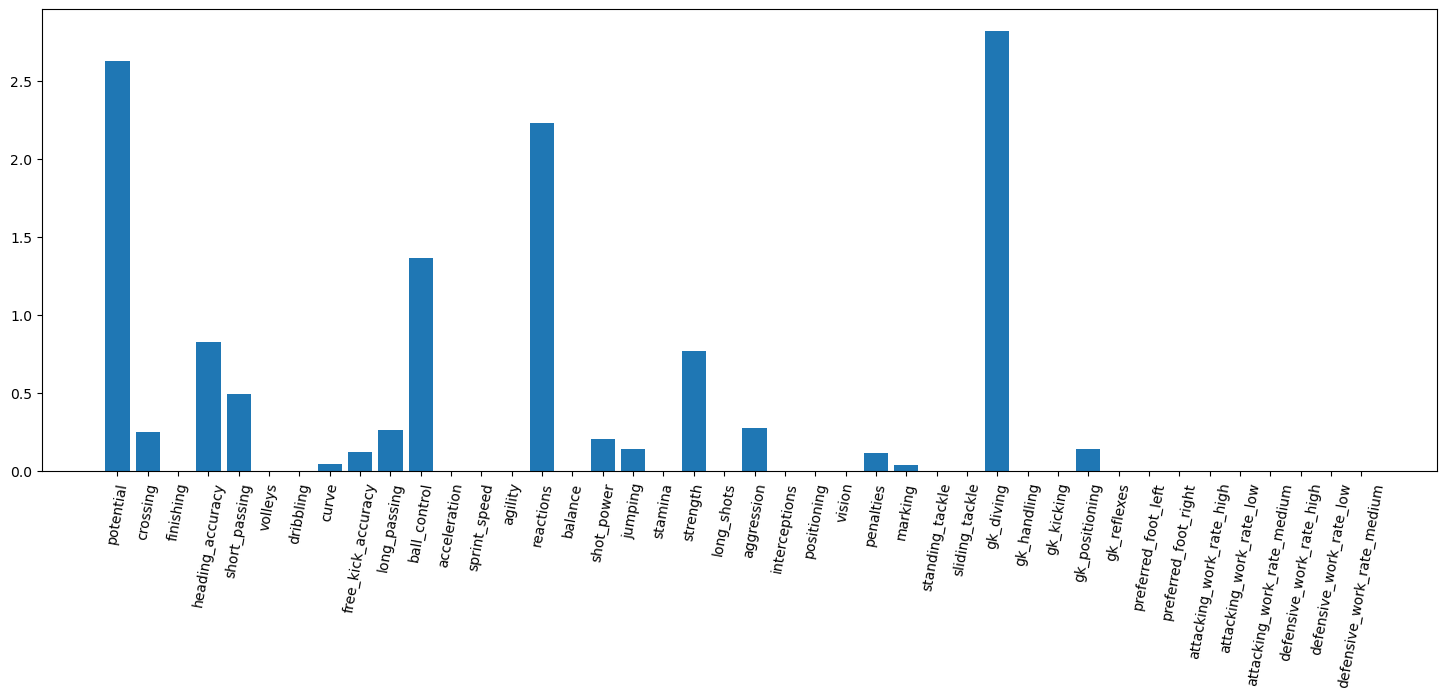

In [27]:
# Lasso Model (To extract the most important feature)
from sklearn.linear_model import Lasso
import matplotlib.pyplot as plt

lasso = Lasso(alpha=0.1)
lasso_coef = lasso.fit(X_train, y_train).coef_

plt.figure(figsize=(18, 6))
plt.bar(X_train.columns, lasso_coef)
plt.xticks(rotation=80)
plt.show()

In [28]:
# Creating a linear regression model
model = LinearRegression()

# Training the model
model.fit(X_train, y_train)

# Making predictions on the test set
y_pred_LR = model.predict(X_test)

model.score(X_test,y_test) * 100

84.52779588748976

In [30]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(model, X, y, cv=5)  # cv is the number of folds (e.g., 5)

# Display the cross-validated scores
print("Cross-validated Scores:", cv_scores*100)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred_LR)
print(f'Mean Squared Error: {mse}')

Cross-validated Scores: [84.73993323 83.88777245 84.31778103 84.3666439  84.70924443]
Mean Squared Error: 7.666012447066224


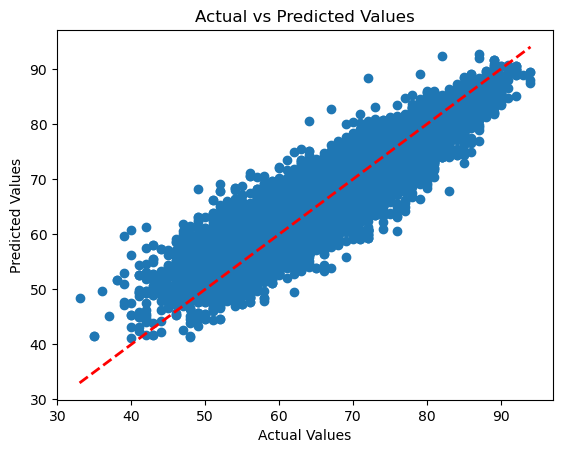

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Assuming you have a DataFrame named 'df' with features and target variable
# X = df[features]
# y = df['target']

plt.scatter(y_test, y_pred_LR)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2)  # Plotting the best-fit line
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()


In [32]:
# Create a KNN regression model
knn_model = KNeighborsRegressor(n_neighbors=5)  # You can adjust the number of neighbors (k)

# Train the model on the scaled training set
knn_model.fit(X_train, y_train)

# Make predictions on the scaled test set
y_pred_KNN = knn_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred_KNN)
print(f'Mean Squared Error: {mse}')
knn_model.score(X_test,y_test) * 100

Mean Squared Error: 2.6846054069396152


94.58169901177052

In [33]:
# Importing Libraries
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor

# Defining the parameters 
knn_params = {
    "n_neighbors": range(1, 11),
    "weights": ["uniform", "distance"], # Weights for weight funciton
    "p": [1, 2],  # Values for the power parameter
}

knn = KNeighborsRegressor()

# Grid
# To change the scoring metric use the metric in refit
grid_search = GridSearchCV(estimator=knn, param_grid=knn_params, n_jobs=-1, cv=5, scoring=["r2", "neg_mean_squared_error"], refit="r2")
grid_results = grid_search.fit(X_train, y_train)

final_model = knn.set_params(**grid_results.best_params_)
final_model.fit(X_train, y_train)
y_pred = final_model.predict(X_test)

print(f'score : {100*grid_results.best_score_}')
print('params : ' , grid_results.best_params_)
print('best : ' , grid_results.best_estimator_)

score : 96.62693681136282
params :  {'n_neighbors': 10, 'p': 1, 'weights': 'distance'}
best :  KNeighborsRegressor(n_neighbors=10, p=1, weights='distance')


In [34]:
# Import necessary libraries
import numpy as np
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

# Load your dataset and prepare features and target variable

# Choose the number of folds (k) for cross-validation
k_folds = 5

# Create a k-fold cross-validation object
kf = KFold(n_splits=k_folds, shuffle=True, random_state=42)

# Function to perform cross-validation and return performance metrics
def evaluate_model(model, X, y):
    mse_scores = cross_val_score(model, X, y, cv=kf, scoring='neg_mean_squared_error')
    return -mse_scores  # Scikit-learn uses neg_mean_squared_error, so we negate it to get positive values

# Evaluate linear regression
linear_regression_scores = evaluate_model(model, X, y)

# Evaluate KNN regression
knn_regression_scores = evaluate_model(knn_model, X, y)

# Print or visualize the results
print(f'Mean MSE for Linear Regression: {linear_regression_scores}')
print(f'Mean MSE for KNN Regression: {knn_regression_scores}')

# Optionally, you can perform statistical tests to compare the models
# For example, you could use paired t-tests to check if the performance difference is statistically significant


Mean MSE for Linear Regression: [7.67290796 7.65053057 7.63365115 7.57982011 7.71300294]
Mean MSE for KNN Regression: [2.1801913  2.15146458 2.17342189 2.18243529 2.12955836]
